In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample as rs
from sklearn.model_selection import train_test_split as tts
%matplotlib inline

In [2]:
df=pd.read_csv('dataset/train.csv')
df.head(10)

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1
5,ANSL_52200,2017-10-25 00:00:00,2019-03-10 13:18:00,0.0,Red,0.92,29.56,0,7,1.0,2
6,ANSL_75444,2018-11-06 00:00:00,2019-04-09 16:00:00,2.0,Brown Tabby,0.14,40.24,0,1,0.0,1
7,ANSL_52759,2018-06-05 00:00:00,2018-09-02 17:04:00,0.0,White,0.15,25.48,7,1,1.0,1
8,ANSL_74632,2015-10-10 00:00:00,2016-08-04 16:29:00,2.0,Brown,0.05,38.22,13,9,1.0,2
9,ANSL_56464,2014-02-18 00:00:00,2017-03-17 11:38:00,2.0,Brown,0.55,21.26,13,9,1.0,2


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pet_id          18834 non-null  object 
 1   issue_date      18834 non-null  object 
 2   listing_date    18834 non-null  object 
 3   condition       17357 non-null  float64
 4   color_type      18834 non-null  object 
 5   length(m)       18834 non-null  float64
 6   height(cm)      18834 non-null  float64
 7   X1              18834 non-null  int64  
 8   X2              18834 non-null  int64  
 9   breed_category  18834 non-null  float64
 10  pet_category    18834 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 1.6+ MB
None


In [4]:
df.isnull().sum()

pet_id               0
issue_date           0
listing_date         0
condition         1477
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
dtype: int64

In [5]:
df=df.drop(['pet_id','issue_date','listing_date'],axis=1)
df.head(5)

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,1.0,White,0.72,14.19,13,9,0.0,2
2,NaN,Brown,0.15,40.90,15,4,2.0,4
3,1.0,White,0.62,17.82,0,1,0.0,2
4,2.0,Black,0.50,11.06,18,4,0.0,1


In [6]:
df.isnull().sum()

condition         1477
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
dtype: int64

## Numeric conversion of catagorical Features

In [7]:
from sklearn.preprocessing import LabelEncoder as LE
df['color_type']=LE().fit_transform(df['color_type'])

# Univariate Analysis

## Nan value treatment

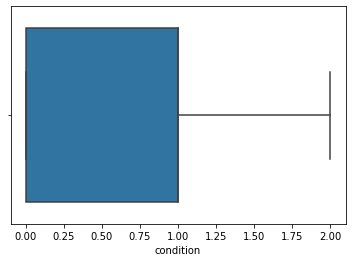

In [8]:
sns.boxplot(df['condition'])
plt.show()

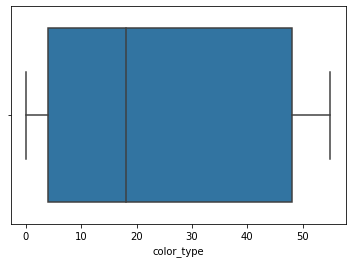

In [9]:
sns.boxplot(df['color_type'])
plt.show()

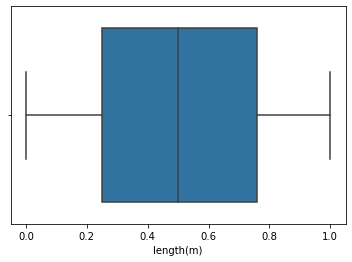

In [10]:
sns.boxplot(df['length(m)'])
plt.show()

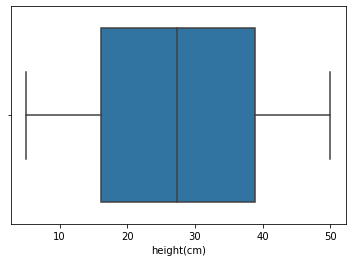

In [11]:
sns.boxplot(df['height(cm)'])
plt.show()

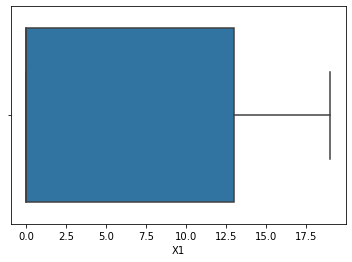

In [12]:
sns.boxplot(df['X1'])
plt.show()

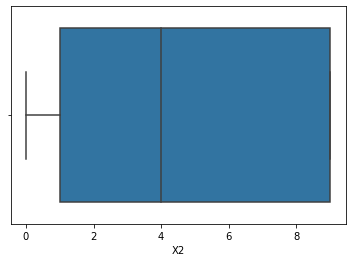

In [13]:
sns.boxplot(df['X2'])
plt.show()

In [14]:
df['condition'].fillna((df['condition'].mean()), inplace=True)

## Skewness removal

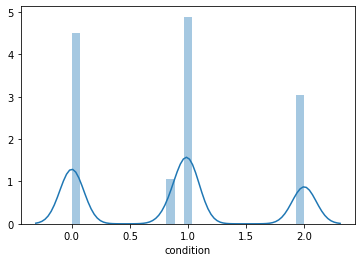

In [15]:
sns.distplot(df['condition'])
plt.show()

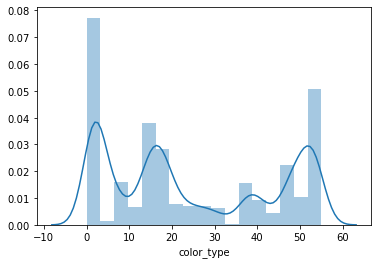

In [16]:
sns.distplot(df['color_type'])
plt.show()

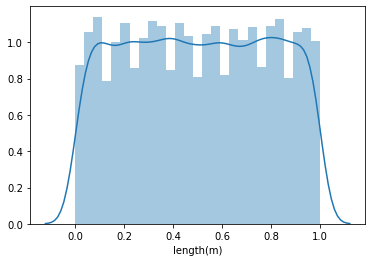

In [17]:
sns.distplot(df['length(m)'])
plt.show()

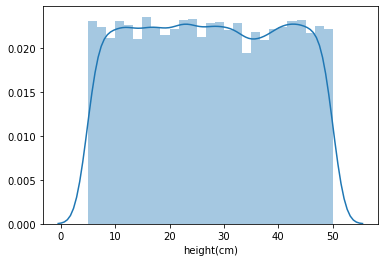

In [18]:
sns.distplot(df['height(cm)'])
plt.show()

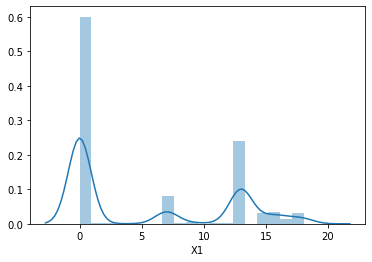

In [19]:
sns.distplot(df['X1'])
plt.show()

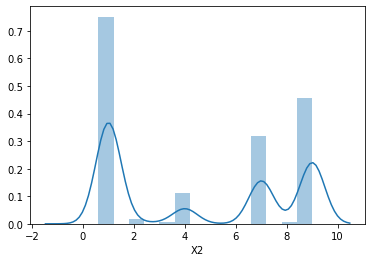

In [20]:
sns.distplot(df['X2'])
plt.show()

In [21]:
print(df.skew())

condition         0.210992
color_type        0.297405
length(m)        -0.002447
height(cm)        0.008525
X1                0.563746
X2                0.129107
breed_category    0.559098
pet_category      1.230389
dtype: float64


# Biclass Classification

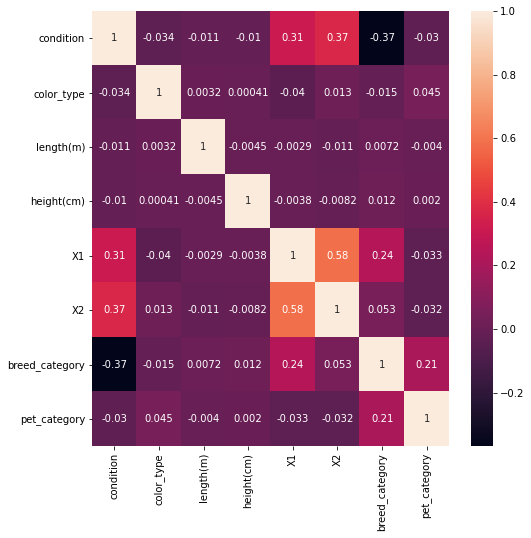

In [22]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Class Imballance

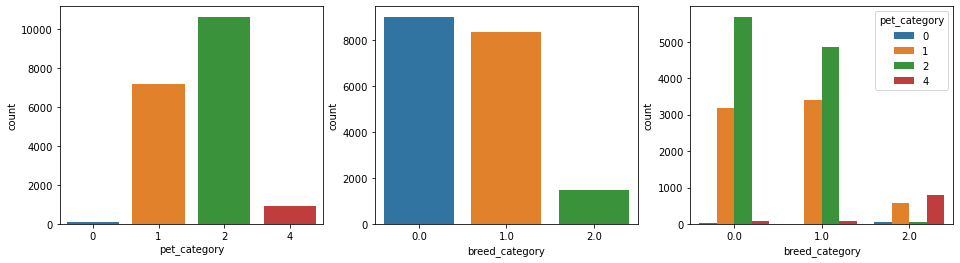

In [23]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.countplot(df['pet_category'])
plt.subplot(1,3,2)
sns.countplot(df['breed_category'])
plt.subplot(1,3,3)
sns.countplot(x='breed_category',hue='pet_category',data=df)
plt.show()

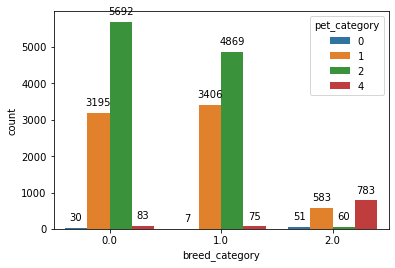

In [24]:
temp=sns.countplot(x='breed_category',hue='pet_category',data=df)
#plt.show()
for p in temp.patches:
    temp.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),\
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [25]:
df.pet_category.value_counts()

2    10621
1     7184
4      941
0       88
Name: pet_category, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split as tts

from sklearn.linear_model import LogisticRegression as LG
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.preprocessing import StandardScaler as SC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.naive_bayes import GaussianNB as GB

from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import recall_score as rcc
from sklearn.metrics import precision_score as prr
from sklearn.metrics import classification_report as cr

# Upsampling

In [27]:
from sklearn.utils import resample as rs
df['balance'] = [1 if ((i==0) or (i==1) or (i==2)) else 0 for i in df.pet_category]
print(df['balance'].value_counts())
major=df[df.balance==1]
minor=df[df.balance==0]
df=rs(minor,replace=True,n_samples=10621,random_state=1)
df=pd.concat([df,major])
df['pet_category'].value_counts()


from sklearn.utils import resample as rs
df['balance'] = [1 if ((i==1) or (i==2) or (i==4)) else 0 for i in df.pet_category]
print(df['balance'].value_counts())
major=df[df.balance==1]
minor=df[df.balance==0]
df=rs(minor,replace=True,n_samples=10621,random_state=1)
df=pd.concat([df,major])
df['pet_category'].value_counts()

from sklearn.utils import resample as rs
df['balance'] = [1 if ((i==0) or (i==2) or (i==4)) else 0 for i in df.pet_category]
print(df['balance'].value_counts())
major=df[df.balance==1]
minor=df[df.balance==0]
df=rs(minor,replace=True,n_samples=10621,random_state=1)
df=pd.concat([df,major])
df['pet_category'].value_counts()

print("\n\n====================",df.shape,"=======================")

1    17893
0      941
Name: balance, dtype: int64
1    28426
0       88
Name: balance, dtype: int64
1    31863
0     7184
Name: balance, dtype: int64


==================== (42484, 9) =======================


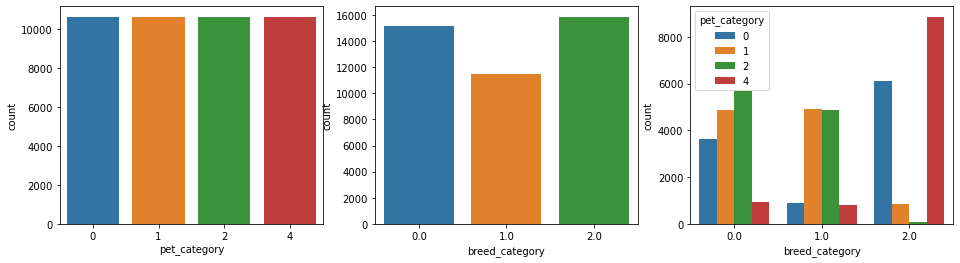

In [28]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.countplot(df['pet_category'])
plt.subplot(1,3,2)
sns.countplot(df['breed_category'])
plt.subplot(1,3,3)
sns.countplot(x='breed_category',hue='pet_category',data=df)
plt.show()

In [29]:
x=df.drop(['pet_category','breed_category','balance'],axis=1)
#x=df.drop(['pet_category','breed_category'],axis=1)
y=df[['pet_category','breed_category']]
print(type(x),type(y))
train_x,test_x,train_y,test_y=tts(x,y,test_size=0.4,random_state=101)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


# Multioutput Regression Method

# Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_x,train_y)
outp = model.predict(test_x)

for i in range(len(outp)):
    outp[i][0]=round(outp[i][0])
    outp[i][1]=round(outp[i][1])

temp=[]
for i in outp: temp.append(i[0])
m=cm(test_y['breed_category'],temp)
print("Confusion Matrix and Classification report for 'breed_category' column")
print(m)
print("Value of 'breed_catagory' column predicted with accuracy: ",acc(temp,test_y['breed_category'])*100,"%")
print(cr(temp,test_y['breed_category']))
temp=[]
for i in outp: temp.append(i[1])
m=cm(test_y['pet_category'],temp)
print("Confusion Matrix and Classification report for 'pet_category' column")
print(m)
print("Value of 'pet_catagory' column predicted with accuracy: ",acc(temp,test_y['pet_category'])*100,"%")
print(cr(temp,test_y['pet_category']))

Confusion Matrix and Classification report for 'breed_category' column
[[  11 3540 2410   26]
 [   5  895 3452  365]
 [   0 1304 4079  907]
 [   0    0    0    0]]
Value of 'breed_catagory' column predicted with accuracy:  29.333882546781215 %
              precision    recall  f1-score   support

         0.0       0.00      0.69      0.00        16
         1.0       0.19      0.16      0.17      5739
         2.0       0.65      0.41      0.50      9941
         3.0       0.00      0.00      0.00      1298

    accuracy                           0.29     16994
   macro avg       0.21      0.31      0.17     16994
weighted avg       0.44      0.29      0.35     16994

Confusion Matrix and Classification report for 'pet_category' column
[[1144 2350  788    0]
 [ 247 3343  684    0]
 [ 879 2967  362    0]
 [ 119 1434 2677    0]]
Value of 'pet_catagory' column predicted with accuracy:  28.53360009415088 %
              precision    recall  f1-score   support

         0.0       0.27    

C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Manually accuracy calculate (Accuracy Intersection)

In [31]:
cnt=0
new1=test_y['breed_category'].tolist()
new2=test_y['pet_category'].tolist()
for i in range(len(outp)):
    if(outp[i][0]==new1[i] and outp[i][1]==new2[i]): cnt+=1
print("Actual accuracy from both output column: ",(cnt/len(outp))*100,"%")

Actual accuracy from both output column:  2.724490996822408 %


# K Neighbors Regressor

In [32]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(train_x,train_y)
outp = model.predict(test_x)

for i in range(len(outp)):
    outp[i][0]=round(outp[i][0])
    outp[i][1]=round(outp[i][1])

temp=[]
for i in outp: temp.append(i[0])
m=cm(test_y['breed_category'],temp)
print("Confusion Matrix and Classification report for 'breed_category' column")
print(m)
print("Value of 'breed_catagory' column predicted with accuracy: ",acc(temp,test_y['breed_category'])*100,"%")
print(cr(temp,test_y['breed_category']))
temp=[]
for i in outp: temp.append(i[1])
m=cm(test_y['pet_category'],temp)
print("Confusion Matrix and Classification report for 'pet_category' column")
print(m)
print("Value of 'pet_catagory' column predicted with accuracy: ",acc(temp,test_y['pet_category'])*100,"%")
print(cr(temp,test_y['pet_category']))

Confusion Matrix and Classification report for 'breed_category' column
[[1504 1912 1930  180  461]
 [ 408 2006 1746  150  407]
 [2442  271   60  100 3417]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]
Value of 'breed_catagory' column predicted with accuracy:  21.007414381546425 %
              precision    recall  f1-score   support

         0.0       0.25      0.35      0.29      4354
         1.0       0.43      0.48      0.45      4189
         2.0       0.01      0.02      0.01      3736
         3.0       0.00      0.00      0.00       430
         4.0       0.00      0.00      0.00      4285

    accuracy                           0.21     16994
   macro avg       0.14      0.17      0.15     16994
weighted avg       0.17      0.21      0.19     16994

Confusion Matrix and Classification report for 'pet_category' column
[[1456  385 2441    0]
 [1939 2132  203    0]
 [2164 1900  144    0]
 [ 372  379 3479    0]]
Value of 'pet_catagory' column predicted with accuracy:  

C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
cnt=0
for i in range(len(outp)):
    if(outp[i][0]==new1[i] and outp[i][1]==new2[i]): cnt+=1
print("Actual accuracy from both output column: ",(cnt/len(outp))*100,"%")

Actual accuracy from both output column:  16.270448393550666 %


# Decision Tree Regressor

In [34]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(train_x,train_y)
outp = model.predict(test_x)

for i in range(len(outp)):
    outp[i][0]=round(outp[i][0])
    outp[i][1]=round(outp[i][1])

temp=[]
for i in outp: temp.append(i[0])
m=cm(test_y['breed_category'],temp)
print("Confusion Matrix and Classification report for 'breed_category' column")
print(m)
print("Value of 'breed_catagory' column predicted with accuracy: ",acc(temp,test_y['breed_category'])*100,"%")
print(cr(temp,test_y['breed_category']))
temp=[]
for i in outp: temp.append(i[1])
m=cm(test_y['pet_category'],temp)
print("Confusion Matrix and Classification report for 'pet_category' column")
print(m)
print("Value of 'pet_catagory' column predicted with accuracy: ",acc(temp,test_y['pet_category'])*100,"%")
print(cr(temp,test_y['pet_category']))

Confusion Matrix and Classification report for 'breed_category' column
[[1465 2077 2023  422]
 [ 400 2131 1769  417]
 [2452  296   16 3526]
 [   0    0    0    0]]
Value of 'breed_catagory' column predicted with accuracy:  21.25456043309403 %
              precision    recall  f1-score   support

         0.0       0.24      0.34      0.28      4317
         1.0       0.45      0.47      0.46      4504
         2.0       0.00      0.00      0.00      3808
         4.0       0.00      0.00      0.00      4365

    accuracy                           0.21     16994
   macro avg       0.17      0.20      0.19     16994
weighted avg       0.18      0.21      0.20     16994

Confusion Matrix and Classification report for 'pet_category' column
[[1456  385 2441    0]
 [1944 1998  332    0]
 [2218 1960   30    0]
 [ 376  358 3496    0]]
Value of 'pet_catagory' column predicted with accuracy:  20.501353418853714 %
              precision    recall  f1-score   support

         0.0       0.34    

C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
cnt=0
for i in range(len(outp)):
    if(outp[i][0]==new1[i] and outp[i][1]==new2[i]): cnt+=1
print("Actual accuracy from both output column: ",(cnt/len(outp))*100,"%")

Actual accuracy from both output column:  18.677180181240438 %


> # Chained Multioutput regression

In [36]:
x=df.drop(['pet_category','breed_category','balance'],axis=1)
#x=df.drop(['pet_category','breed_category'],axis=1)
y=df[['pet_category','breed_category']]
print(type(x),type(y))
train_x,test_x,train_y,test_y=tts(x,y,test_size=0.4,random_state=101)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [37]:
train_x_bkp=train_x.copy()
train_y_bkp=train_y.copy()
test_x_bkp=test_x.copy()
test_y_bkp=test_y.copy()
train_x.head(5)
train_y.head(5)

,pet_category,breed_category
15163,0,2.0
78,0,2.0
9220,4,0.0
6987,4,2.0
14766,2,1.0


In [38]:
train_y=train_y.drop(['breed_category'],axis=1)
bkp_y=test_y.copy()
test_y=test_y.drop(['breed_category'],axis=1)
print(type(train_x))
print(type(train_y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [39]:
train_x.head(5)
test_y.head(5)

,pet_category
2713,4
11634,1
11970,2
7671,2
12881,4


## Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB as GB
model_GB=GB().fit(train_x,train_y)
model_GB.fit(train_x,train_y)
predict_GB = model_GB.predict(test_x)

cm_GB=cm(test_y,predict_GB)
print("Confusion Matrix and Classification report for 'breed_category' column")
print(cm_GB)
print(acc(predict_GB,test_y))
print(cr(predict_GB,test_y))

Confusion Matrix and Classification report for 'breed_category' column
[[1966  446 1007  863]
 [ 725 1817 1539  193]
 [ 733  809 2597   69]
 [ 363  451  546 2870]]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.5443097563846063
              precision    recall  f1-score   support

           0       0.46      0.52      0.49      3787
           1       0.43      0.52      0.47      3523
           2       0.62      0.46      0.52      5689
           4       0.68      0.72      0.70      3995

    accuracy                           0.54     16994
   macro avg       0.54      0.55      0.54     16994
weighted avg       0.56      0.54      0.54     16994



# Linear SVM

In [41]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
model_SVC = make_pipeline(StandardScaler(),
                     LinearSVC(random_state=0, tol=1e-5))
model_SVC.fit(train_x,train_y)
predict_SVC=model_SVC.predict(test_x)
cm_SVC=cm(test_y,predict_SVC)
print("Confusion Matrix and Classification report for 'breed_category' column")
print(cm_GB)
print(acc(predict_SVC,test_y))
print(cr(predict_SVC,test_y))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Confusion Matrix and Classification report for 'breed_category' column
[[1966  446 1007  863]
 [ 725 1817 1539  193]
 [ 733  809 2597   69]
 [ 363  451  546 2870]]
0.5025891491114511
              precision    recall  f1-score   support

           0       0.53      0.49      0.50      4634
           1       0.15      0.43      0.22      1497
           2       0.64      0.47      0.54      5714
           4       0.70      0.57      0.63      5149

    accuracy                           0.50     16994
   macro avg       0.50      0.49      0.48     16994
weighted avg       0.58      0.50      0.53     16994



# Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier as dtc
model_DTC=dtc(criterion='entropy',random_state=1).fit(train_x,train_y)
model_DTC.fit(train_x,train_y)
predict_DTC = model_DTC.predict(test_x)

cm_DTC=cm(test_y,predict_DTC)
print("Confusion Matrix and Classification report for 'breed_category' column")
print(cm_DTC)
print(acc(predict_DTC,test_y))
print(cr(predict_DTC,test_y))

Confusion Matrix and Classification report for 'breed_category' column
[[4282    0    0    0]
 [   6 3854  371   43]
 [  15  652 3468   73]
 [   0    0    0 4230]]
0.931740614334471
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4303
           1       0.90      0.86      0.88      4506
           2       0.82      0.90      0.86      3839
           4       1.00      0.97      0.99      4346

    accuracy                           0.93     16994
   macro avg       0.93      0.93      0.93     16994
weighted avg       0.93      0.93      0.93     16994



# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression as LG
model_LG=LG().fit(train_x,train_y)
predict_LG = model_LG.predict(test_x)

cm_LG=cm(test_y,predict_LG)
print("Confusion Matrix and Classification report for 'breed_category' column")
print(cm_LG)
print(acc(predict_LG,test_y))
print(cr(predict_LG,test_y))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Confusion Matrix and Classification report for 'breed_category' column
[[2158  391  816  917]
 [ 977 1395 1114  788]
 [ 812  900 2284  212]
 [ 395  393  540 2902]]
0.514240320112981
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      4342
           1       0.33      0.45      0.38      3079
           2       0.54      0.48      0.51      4754
           4       0.69      0.60      0.64      4819

    accuracy                           0.51     16994
   macro avg       0.51      0.51      0.51     16994
weighted avg       0.53      0.51      0.52     16994



C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier as RFC
model_RFC = RFC(max_depth=6, random_state=0)
model_RFC.fit(train_x,train_y)
predict_RFC = model_RFC.predict(test_x)

cm_RFC=cm(test_y,predict_RFC)
print("Confusion Matrix and Classification report for 'breed_category' column")
print(cm_RFC)
print(acc(predict_RFC,test_y))
print(cr(predict_RFC,test_y))

<ipython-input-44-47c82098a1a8>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RFC.fit(train_x,train_y)


Confusion Matrix and Classification report for 'breed_category' column
[[3894  107  104  177]
 [ 115 3101  996   62]
 [  92  727 3369   20]
 [ 406  321  390 3113]]
0.7930446039778746
              precision    recall  f1-score   support

           0       0.91      0.86      0.89      4507
           1       0.73      0.73      0.73      4256
           2       0.80      0.69      0.74      4859
           4       0.74      0.92      0.82      3372

    accuracy                           0.79     16994
   macro avg       0.79      0.80      0.79     16994
weighted avg       0.80      0.79      0.79     16994



# Multi Layer Perception Classifier

In [45]:
from sklearn.neural_network import MLPClassifier
model_MLPC = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
model_MLPC.fit(train_x,train_y)
predict_MLPC = model_MLPC.predict(test_x)

cm_MLPC=cm(test_y,predict_MLPC)
print("Confusion Matrix and Classification report for 'breed_category' column")
print(cm_MLPC)
print(acc(predict_MLPC,test_y))
print(cr(predict_MLPC,test_y))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Confusion Matrix and Classification report for 'breed_category' column
[[   0  386 2904  992]
 [   0 1676 2239  359]
 [   0  629 3445  134]
 [   0  352 1012 2866]]
0.46998940802636224
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.39      0.55      0.46      3043
           2       0.82      0.36      0.50      9600
           4       0.68      0.66      0.67      4351

    accuracy                           0.47     16994
   macro avg       0.47      0.39      0.41     16994
weighted avg       0.71      0.47      0.53     16994



C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree had the greatest accuracy and precision and oveerall F1 score

# Column 2 prediction

## Taking *predicted* lebel 1 ('pet_category') data to train the model and predict level 2 ('breed_category') output

In [46]:
train_x_bkp['pet_category']=train_y_bkp['pet_category']
train_y_bkp=train_y_bkp.drop(['pet_category'],axis=1)
test_x_bkp['pet_category']=test_y_bkp['pet_category']
test_y_bkp=test_y_bkp.drop(['pet_category'],axis=1)

In [47]:
from sklearn.tree import DecisionTreeClassifier as dtc
model_DTC=dtc(criterion='entropy',random_state=1).fit(train_x_bkp,train_y_bkp)
model_DTC.fit(train_x_bkp,train_y_bkp)
predict_DTC2 = model_DTC.predict(test_x_bkp)

cm_DTC=cm(test_y_bkp,predict_DTC2)
print("Confusion Matrix and Classification report for 'breed_category' column")
print(cm_DTC)
print(acc(predict_DTC2,test_y_bkp))
print(cr(predict_DTC2,test_y_bkp))

Confusion Matrix and Classification report for 'breed_category' column
[[5681  306    0]
 [ 319 4398    0]
 [   0    0 6290]]
0.9632223137577969
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      6000
         1.0       0.93      0.93      0.93      4704
         2.0       1.00      1.00      1.00      6290

    accuracy                           0.96     16994
   macro avg       0.96      0.96      0.96     16994
weighted avg       0.96      0.96      0.96     16994



In [50]:
cnt=0
test1=test_y['pet_category'].tolist()
test2=test_y_bkp['breed_category'].tolist()
for i in range(len(test1)):
    if(test1[i]==predict_DTC[i] and test2[i]==predict_DTC2[i]): cnt+=1
print("Actual accuracy from both output column: ",(cnt/len(test1))*100,"%")

Actual accuracy from both output column:  90.56725903259975 %
